In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-data/train.csv
/kaggle/input/mnist-data/test.csv


## Loading the DataSet

In [44]:
# read train
train = pd.read_csv("/kaggle/input/mnist-data/train.csv")
print(train.shape)
train.head(10)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# reading test csv file: only difference is label column
test = pd.read_csv("/kaggle/input/mnist-data/test.csv")
print(test.shape)  # 1 eksik olmasının sebebi bunda label yok
test.head(5000)

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# getting Y_train with labels
Y_train = train["label"]
# getting X_train with train dataset except label column
X_train = train.drop(labels = ["label"], axis=1)

Text(0.5, 1.0, 'number of digit classes')

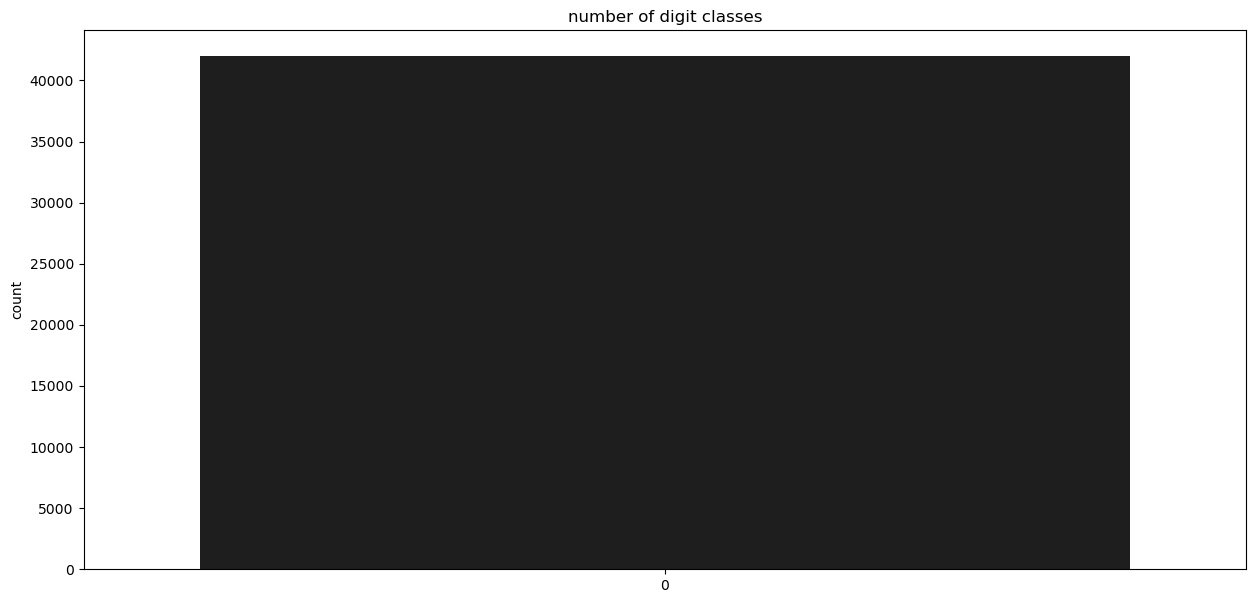

In [47]:
# visualize number of digits classes
plt.figure(figsize = (15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("number of digit classes")

In [48]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

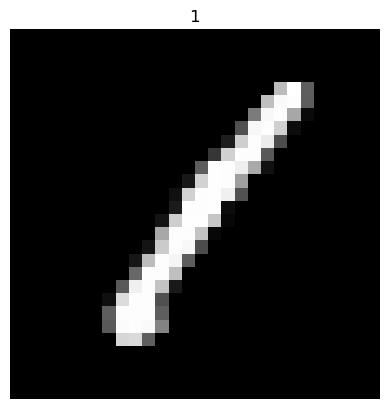

In [49]:
# plotting some samples 
img = X_train.iloc[0].to_numpy() # this line selects the first row of the DataFrame X_train and converts it into a NumPy array 
img = img.reshape(28,28)  # The reshape() function is applied to img to change its shape from a 1D array to a 2D array with dimensions 28x28. This is done to match the expected shape of the image, assuming it is a grayscale image with a resolution of 28x28 pixels.
plt.imshow(img, cmap="gray")  # imshow(): display the image, cmap="gray": grayscale
plt.title(train.iloc[0,0])  # This line sets the title to value found in the first row and first column of the DataFrame. Which is also in label column
plt.axis("off")
plt.show()

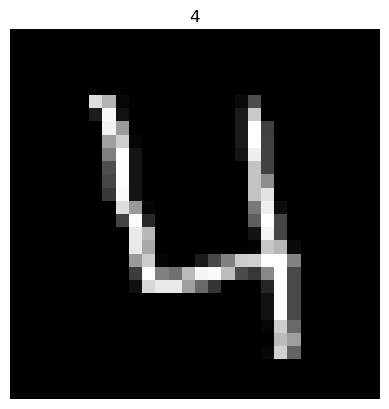

In [50]:
img = X_train.iloc[3].to_numpy()
img = img.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

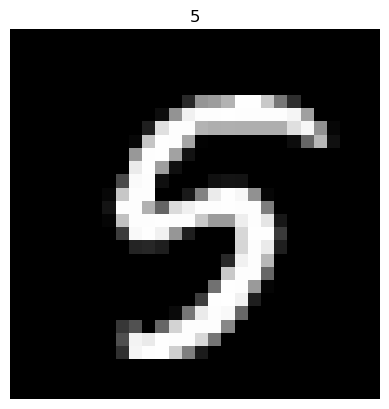

In [51]:
img = X_train.iloc[8].to_numpy()
img = img.reshape(28,28)
plt.imshow(img, cmap="gray")
plt.title(train.iloc[8,0])
plt.axis("off")
plt.show()

## Normalization, Reshape and Label Encoding

* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [52]:
# normalizing data
X_train = X_train / 255.0
test = test / 255.0
print("X_train shape: ", X_train.shape)
print("test shape: ", test.shape)

X_train shape:  (42000, 784)
test shape:  (28000, 784)


In [53]:
# reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [54]:
# label encoding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

## Train Test Split

In [55]:
# Split the train and validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


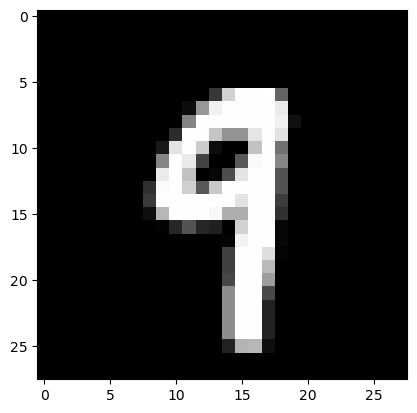

In [56]:
# Some examples
plt.imshow(X_train[2][:,:,0], cmap="gray")  # [:,:,0] is used to specify the slice of the image data, indicating that we want to display all rows and columns of the image but only the first channel.
plt.show()

# Convolutional Neural Network

* Same Padding
* Max Pooling
* Flattening
* Full Connection

## Implementing With Keras

### Create Model
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)

In [57]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, 
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu', 
                 input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters=16,
                kernel_size = (3,3),
                padding="Same",
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

### Define optimizer

In [58]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

### Compile model

In [59]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

### Epochs and Batch Size

In [60]:
epochs = 10  # for better result increase the epochs
batch_size = 250

### Data Augmentation

In [61]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

### Fit the model

In [62]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 21s 134ms/step - loss: 2.2008 - accuracy: 0.1766 - val_loss: 1.7751 - val_accuracy: 0.3812
Epoch 2/10
151/151 [==============================] - 20s 131ms/step - loss: 1.9005 - accuracy: 0.3219 - val_loss: 1.1518 - val_accuracy: 0.6910
Epoch 3/10
151/151 [==============================] - 19s 128ms/step - loss: 1.6817 - accuracy: 0.4112 - val_loss: 0.8161 - val_accuracy: 0.7952
Epoch 4/10
151/151 [==============================] - 19s 127ms/step - loss: 1.5598 - accuracy: 0.4587 - val_loss: 0.6198 - val_accuracy: 0.8298
Epoch 5/10
151/151 [==============================] - 19s 128ms/step - loss: 1.4700 - accuracy: 0.4908 - val_loss: 0.5065 - val_accuracy: 0.8800
Epoch 6/10
151/151 [==============================] - 19s 127ms/step - loss: 1.4205 - accuracy: 0.5114 - val_loss: 0.4464 - val_accuracy: 0.8812
Epoch 7/10
151/151 [==============================] - 20s 130ms/step - loss: 1.3799 - accuracy: 0.5279 - val_loss: 0.4112 - val_ac

### Evaluate the model

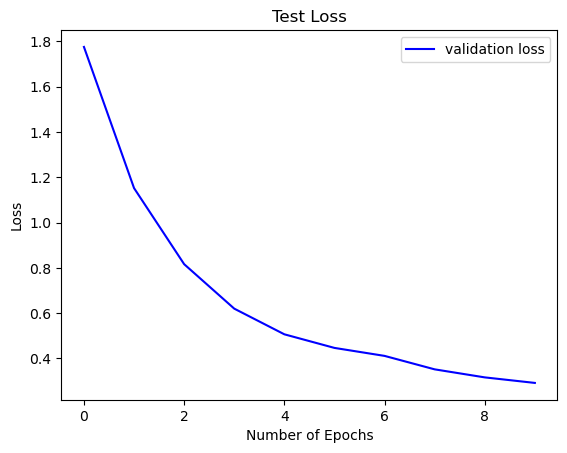

In [63]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 6ms/step


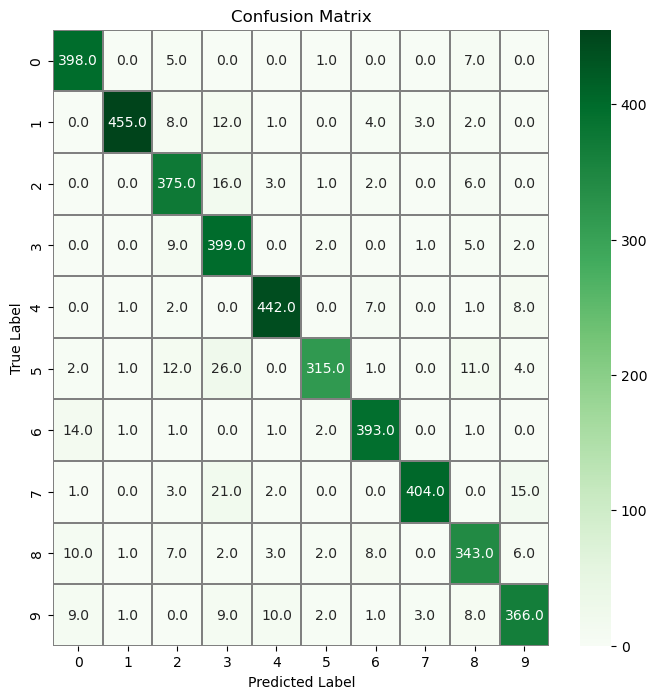

In [64]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()